<a href="https://colab.research.google.com/github/merdogan97/Projects/blob/main/Titanic_Project_25_02_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION**
## **Titanic was a British passenger liner, operated by the White Star Line, which sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg during her maiden voyage from Southampton, UK, to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, which made the sinking possibly one of the deadliest for a single ship up to that time. It remains to this day the deadliest peacetime sinking of a superliner or cruise ship. The disaster drew much public attention, provided foundational material for the disaster film genre, and has inspired many artistic works.**

# **Content:**

 [**1. Loading and Checking Data**](#1)

 [**2. Variable Description**](#2)
     
   [- Univariate Variable Analysis](#3)
     
   [- Categorical Variables Analysis](#4)
        
   [- Numerical Variables Analysis](#5)
 
[**3. Basic Data Analysis**](#6)
 
[**4. Outlier Detection**](#7)

[**5. Missing Values**](#8)

  [- Finding Missing Values](#9)
  
  [- Filling Missing Values](#10)
 


In [124]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns

from collections import Counter
import warnings

warnings.filterwarnings("ignore")



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



<a id ="1"></a><br>
# **Loading and Ckecking Data**

In [6]:
train_df = pd.read_csv("/content/train.csv")

In [7]:
# plt.style.available

In [8]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
160,161,0,3,"Cribb, Mr. John Hatfield",male,44.0,0,1,371362,16.1000,NaN,S
243,244,0,3,"Maenpaa, Mr. Matti Alexanteri",male,22.0,0,0,STON/O 2. 3101275,7.1250,NaN,S
73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9000,NaN,S
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S
350,351,0,3,"Odahl, Mr. Nils Martin",male,23.0,0,0,7267,9.2250,NaN,S
645,646,1,1,"Harper, Mr. Henry Sleeper",male,48.0,1,0,PC 17572,76.7292,D33,C
695,696,0,2,"Chapman, Mr. Charles Henry",male,52.0,0,0,248731,13.5000,NaN,S
778,779,0,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
625,626,0,1,"Sutton, Mr. Frederick",male,61.0,0,0,36963,32.3208,D50,S


In [11]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<a id ="2"></a><br>
# **Variable Decriptions**
 1. PassengerId : unique Id number to each passenger
 2. Survived    : passenger survive (1) or died (0) 
 3. Pclass      : passenger class
 4. Name        : The name of passenger   
 5. Sex         : Gender of passengers         
 6. Age         : age of passenger    
 7. SibSp       : number of siblings /spouses    
 8. Parch       : number of parents/ children    
 9. Ticket      : ticket number
 10. Fare       : amount of money spent on ticket    
 11. Cabin      : Cabin category     
 12. Embarked   : (C= Cherbourg, Q = Ouenstown, S = Southampton)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# * **float64(2): Fare and Age**
# * **int64(5)  : Pclass, sibsp, parch, passengerId and survived**
# * **object(5) : Cabin, embarked, ticket, name and sex**

<a id ="3"></a><br>
#**Univariate Variable Analysis**
 * Categorical Variables Analysis : Survive, Sex, Pclass, Embark, Name, Ticket, Sibsp, and Parch
 * Numerical Variables Analysis : Age, PassengerId, Fare

<a id ="4"></a><br>
# **Categorical Variable Analysis**

In [51]:
def bar_plot(variable):
    """
        input : variable ex:"Sex"
        output: bar plot & value count
    """
    var = train_df[variable]          # getting feature
    varValue= var.value_counts()      #  counting number of categorical (value/sample)
    
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

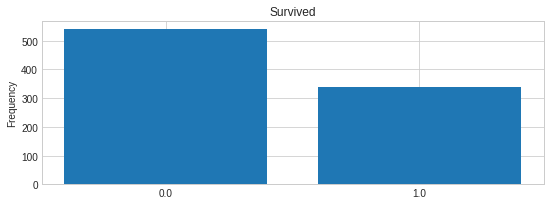

Survived: 
 0.0    541
1.0    340
Name: Survived, dtype: int64


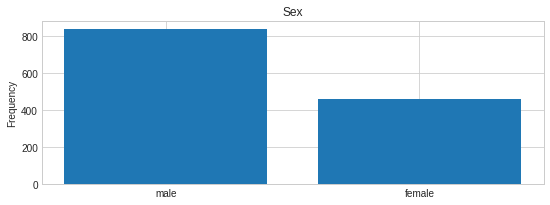

Sex: 
 male      838
female    461
Name: Sex, dtype: int64


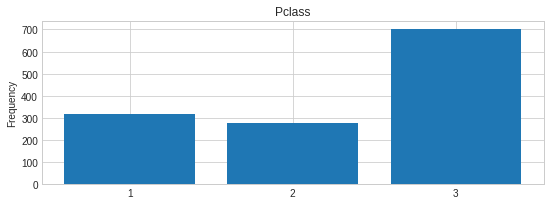

Pclass: 
 3    702
1    320
2    277
Name: Pclass, dtype: int64


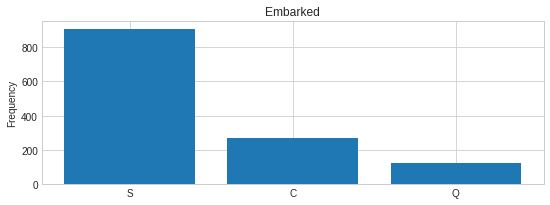

Embarked: 
 S    904
C    272
Q    123
Name: Embarked, dtype: int64


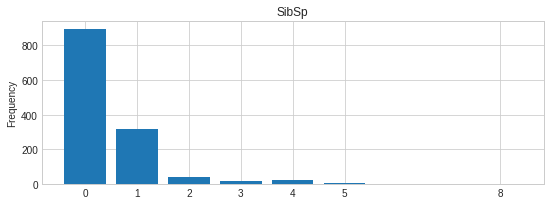

SibSp: 
 0    891
1    319
2     42
4     22
3     17
5      6
8      2
Name: SibSp, dtype: int64


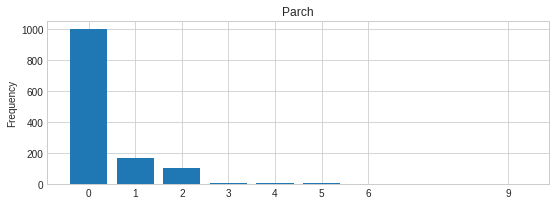

Parch: 
 0    1002
1     170
2     103
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64


In [52]:
category1 = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]
for c in category1:
    bar_plot(c)

 # **Analysis:**
 
**1. The values are not equal, 549 died, 342 alive. We can conclude that dataset of Survive is inbalance.**

**2.Dataset of Sex is also inbalance. We can say that the number of women is about half the men.**

**If there isa a passenger whom we dont know his/her identity,  we can  predict of this passenger that is high probably a male.**

**3. There are three classes of passenger. According to data, we can easily see that most of the deads are 3rd class of passengers. 
Probably, these groups of passengers had travelled at the ground floors of the ship. We can conclude that during the evacuation of the ship, 
the filikas(lifeboats) were given priority to first class of passengers, children and women.**
**4. We can say that most of the passenger are from Southampton (644), the least of them are from Ouenstown(77).**

**5. According to fifth figure, we can state that most of the passengers (686) havent any parental relations.**

**6.  678 of The passengers has no relationship with other passengers. We can say that while first class of 
passengers had been travelling for an adventure trip, a these alone passengers might have traveled to reach America for settling a new life.**

# **Embarked - Pclass - Survived - Sex**

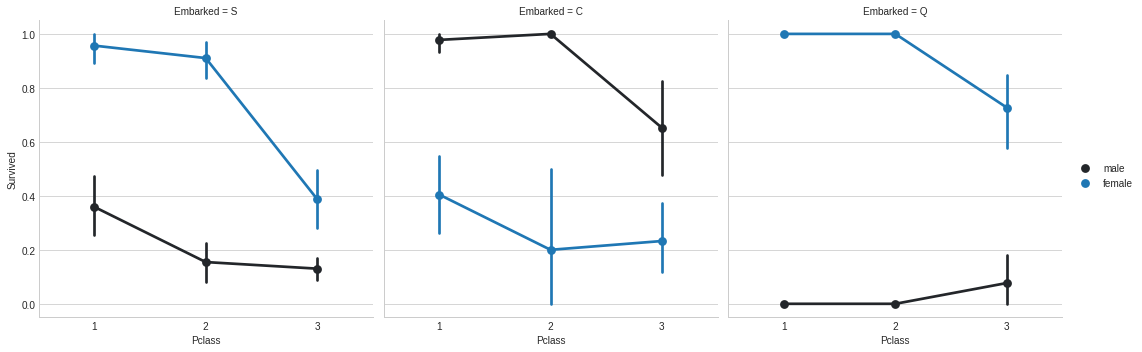

In [123]:
g= sns.FacetGrid(data=train_df, col ="Embarked", size=5)
g.map(sns.pointplot, "Pclass", "Survived", "Sex")
g.add_legend()
plt.show()

# **Analysis:**

## **- Female passengers have much better survival rate than males.**

## **- Pclass 2 female passengers from Cherbourg have less chance to survive than the others.**

In [16]:
category2 = ["Cabin", "Name", "Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64 

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 



<a id ="5"></a><br>
# **Numerical Variable Analysis**

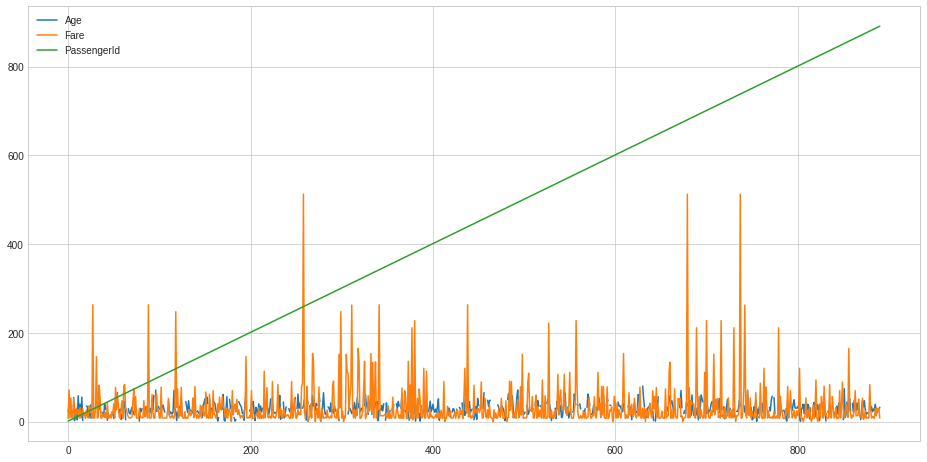

In [17]:
df_train = train_df.loc[:,["Age","Fare","PassengerId"]]
df_train.plot(figsize=(16,8))

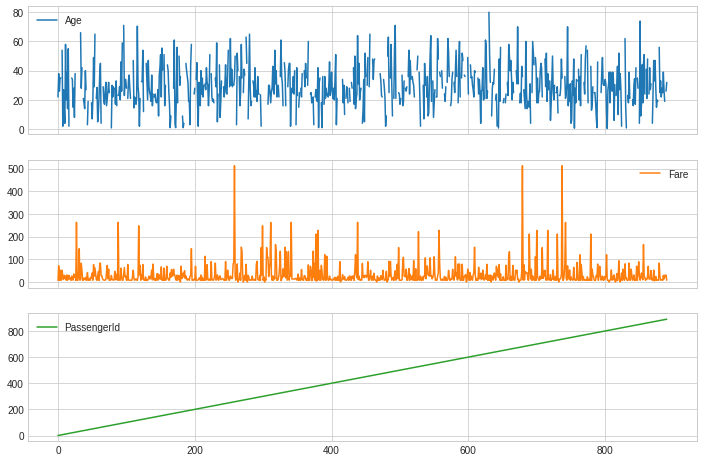

In [18]:
df_train.plot(subplots = True, figsize=(12,8))
plt.show()

In [19]:
def plot_hist(variable):
    
    plt.figure(figsize=(9,3)) 
    plt.hist(train_df[variable], bins = 100)    #  bins= 10  default 10
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()
    


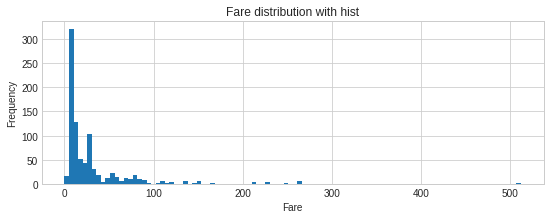

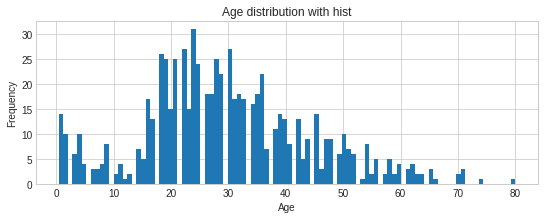

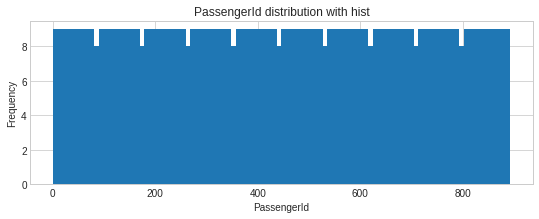

In [20]:
numericVar = ["Fare", "Age", "PassengerId"]

for n in numericVar:
    plot_hist(n)

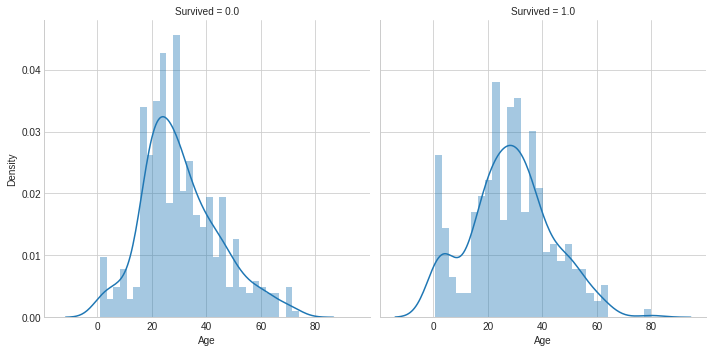

In [108]:
 # age-Survived:
g= sns.FacetGrid(data=train_df, col ="Survived", size=5)
g.map(sns.distplot, "Age", bins= 30)
plt.show()

 # **Analysis:**

## **AGE <= 10 has a high survival rate.**

## **Age of 80's have more survived chance.**

## **Age of around 20's have less survive.**

## **Most of the passengers are in 15-35 age range.**


 # **Analysis:**

**Figure 1:** 

**- We can see that most of the passengers had paid less than 50$.**

***- We can conclude that they are second and third class passengers. There is small group of passengers  that paid more than 100$. ***

***- Probably their tickets might have been paid in group as family or relative. We can't make an exact inference about whether they are rich or poor passengers. ***

**Figure-2 :**

** **We can conclude that there are passengers from every ages of group.  Especially we can remark that there is an enough amount of children that we cant ignore.  And we can certainly state that most of the passengers are at middle-age group between 20-40s.  If we ignore below age 14, we can see the there is a right skewed distribution at figure-2.  It means that mean of age is bigger tham median and mode. And most of the passengers are accumulated between 20-30s.**

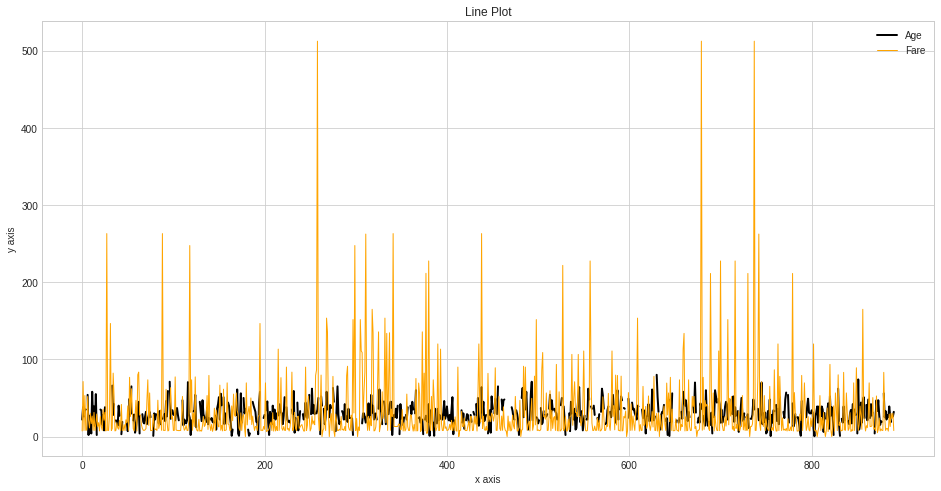

In [21]:
# line-Plot: 

train_df.Age.plot(kind = 'line', color = 'black',label = 'Age',linewidth=2,alpha = 1,grid = True,linestyle = '-', figsize=(16,8))
train_df.Fare.plot(color = 'orange',label = 'Fare',linewidth=1, alpha = 1,grid = True,linestyle = '-')
plt.legend(loc='upper right')     
plt.xlabel('x axis')              
plt.ylabel('y axis')
plt.title('Line Plot')            
plt.show()

Text(0.5, 1.0, 'Age-Fare Scatter Plot')

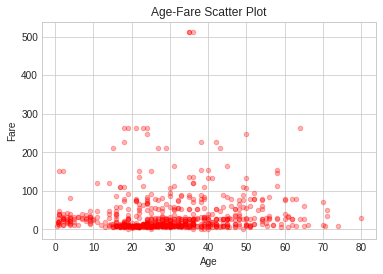

In [22]:
# Scatter Plot 
rain_df.plot(kind='scatter', x='Age', y='Fare',alpha = 0.3,color = 'red')
plt.xlabel('Age')              
plt.ylabel('Fare')
plt.title('Age-Fare Scatter Plot')  

<a id ="6"></a><br>
# **Basic Data Analysis**

**1. Pclass - Survived**

**2. Sex - Survived**

**3. SibSp - Survived**

**4. Parch - Survived**

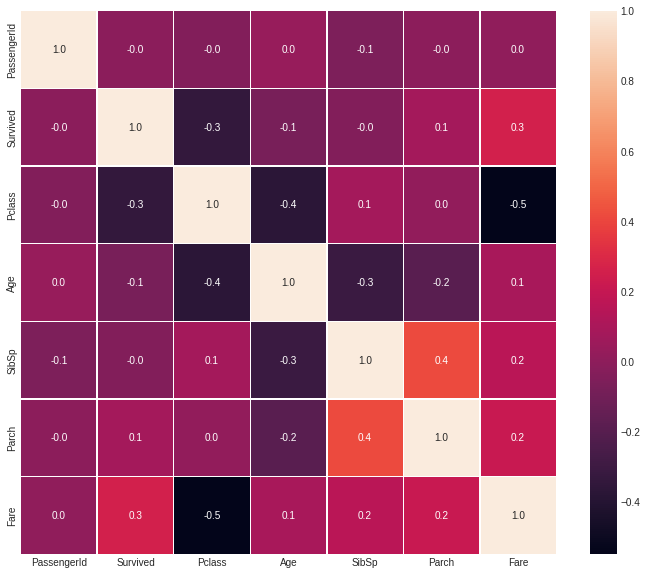

In [23]:
#correlation map
f,ax = plt.subplots(figsize=(12, 10))
sns.heatmap(train_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [24]:
df_corr = train_df.corr()[["Survived"]].sort_values(by="Survived", ascending=False)
df_corr

,Survived
Survived,1.000000
Fare,0.257307
Parch,0.081629
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.077221
Pclass,-0.338481


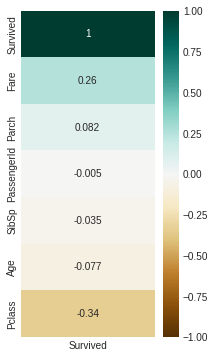

In [25]:
plt.figure(figsize=(3, 6)) 
sns.heatmap(df_corr, annot= True, cmap="BrBG", vmin= -1, vmax= 1)

 # **Analysis:**
 
**Correlation is a measure of the relationship between two variables. The measure (identified by the variable r) reflects both the strength of the relation on a scale from 0 to 1 and its direction - either positive or negative. No relation is indicated when r is in the neighborhood of zero.**

* **-1 indicates a perfectly negative linear correlation between two variables.**
* **0 indicates no linear correlation between two variables.**
* **1 indicates a perfectly positive linear correlation between two variables.**

**Now, we can see the relationship between two variables at map. For example there is a negative correlation between Fare and Pclass. Furthermore there is slightly negative correlation between Survived and Pclass. It means that as the prices goes down, the percentage of dead 2nd and 3rd Class passengers goes up. On the other hand, we can say that there is slightly positive correlation between Fare and Survived of passengers. As the price of ticket goes up, the percentage of survived passengers goes up slightly.**

# **Pclass- Survived:**

In [60]:
df_survived= train_df[["Pclass", "Survived"]].groupby(["Pclass"],as_index= False).mean().sort_values(by="Survived", ascending=False)
df_survived

,Pclass,Survived
0,1,0.629108
1,2,0.472826
2,3,0.245868


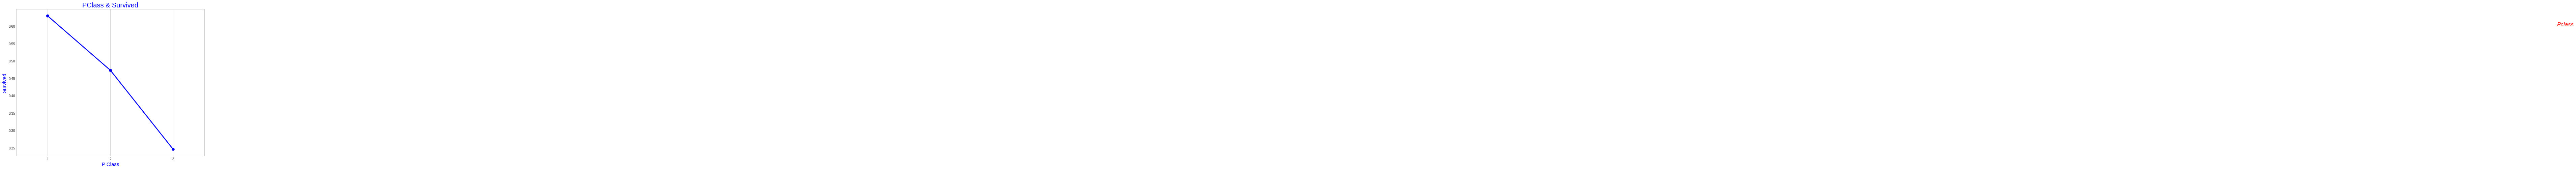

In [74]:
f,ax1 = plt.subplots(figsize =(10,8))
sns.pointplot(x='Pclass' , y='Survived', data=df_survived,color='blue',alpha=0.8)
plt.text(40,0.6,'Pclass',color='red',fontsize = 17,style = 'italic')
plt.xlabel('P Class',fontsize = 15,color='blue')
plt.ylabel('Survived',fontsize = 15,color='blue')
plt.title('PClass & Survived',fontsize = 20,color='blue')
plt.grid()


<function matplotlib.pyplot.show>

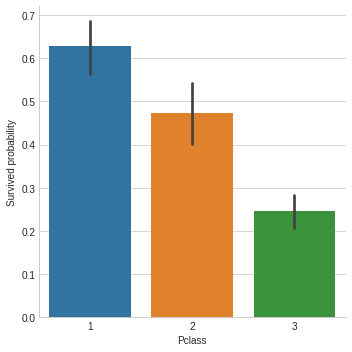

In [95]:
g= sns.factorplot( x= "Pclass", y= "Survived", data=train_df, kind="bar", size=5)
g.set_ylabels("Survived probability")
plt.show

# **Analysis:**
## **- Pclass 1 has more chance to survive**


# **Pclass-Age-Survived:**

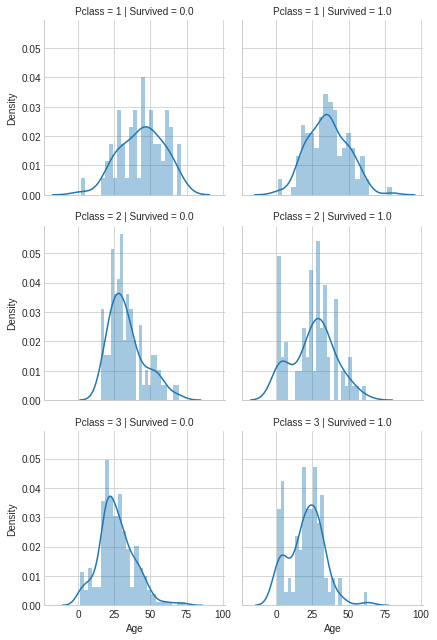

In [119]:
g= sns.FacetGrid(data=train_df, col ="Survived", row="Pclass")
g.map(sns.distplot, "Age", bins= 25)
g.add_legend()
plt.show()

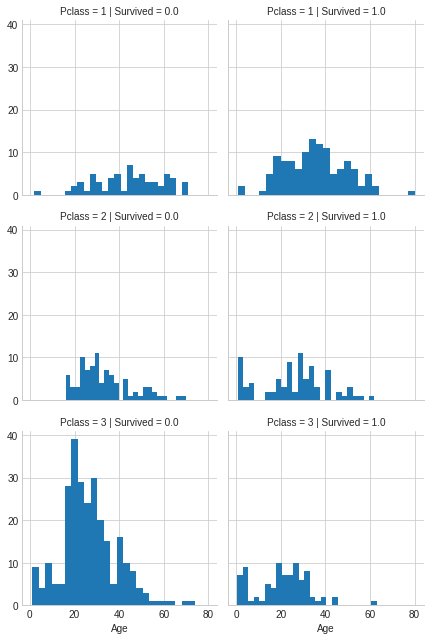

In [120]:
 # or:
g= sns.FacetGrid(data=train_df, col ="Survived", row="Pclass")
g.map(plt.hist, "Age", bins= 25)
g.add_legend()
plt.show()

# **Analysis:**

### **- Pclass is an important feature for our analysises.**

### **- We can see more passenger and age of below 30's are in Pclass 3.**

# **Sex- Survived:**

In [79]:
train_df[["Sex", "Survived"]].groupby(["Sex"],as_index= False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.747573
1,male,0.190559


Text(0.5, 1.0, 'Sex')

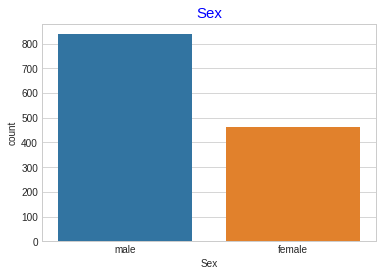

In [86]:
sns.countplot(train_df.Sex)
plt.title("Sex",color = 'blue',fontsize=15)

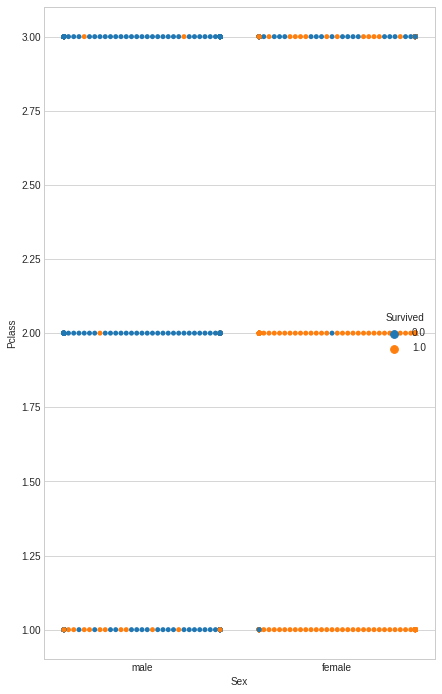

In [84]:
plt.figure(figsize = (7,12))
sns.swarmplot(x="Sex", y="Survived", hue="Pclass", data=train_df)
plt.show()

# **SibSp- Survived:**

In [90]:
train_df[["SibSp", "Survived"]].groupby(["SibSp"],as_index= False).mean().sort_values(by="Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000
6,8,NaN


Text(0.5, 1.0, 'SibSp')

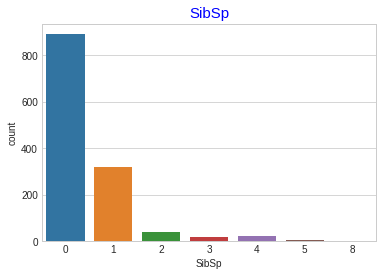

In [85]:
sns.countplot(train_df.SibSp)
plt.title("SibSp",color = 'blue',fontsize=15)

# **Analysis:**

## **- Having more SibSp have less chance to survive.**

## **- There is a high probability of survived SibSp 2 and belows.**

<function matplotlib.pyplot.show>

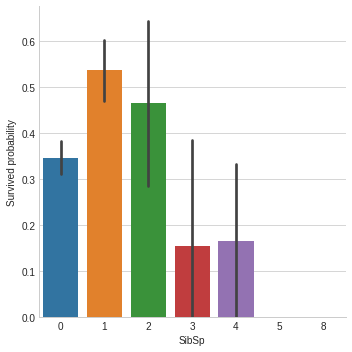

In [93]:
g= sns.factorplot( x= "SibSp", y= "Survived", data=train_df, kind="bar", size=5)
g.set_ylabels("Survived probability")
plt.show

# **Analysis:**

## **- There is a high probability of died SibSp 2 and aboves.**

## **- Having less SibSp have more chance to survive.**

# **Parch - Survived:**

In [29]:
train_df[["Parch", "Survived"]].groupby(["Parch"],as_index= False).mean().sort_values(by="Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<function matplotlib.pyplot.show>

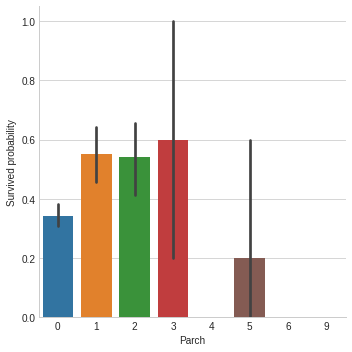

In [94]:
g= sns.factorplot( x= "Parch", y= "Survived", data=train_df, kind="bar", size=5)
g.set_ylabels("Survived probability")
plt.show

Text(0.5, 1.0, 'Parch')

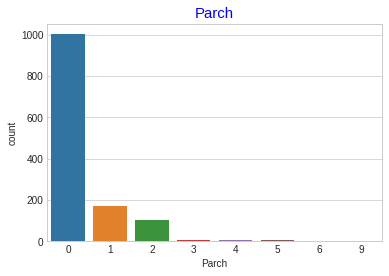

In [87]:
sns.countplot(train_df.Parch)
plt.title("Parch",color = 'blue',fontsize=15)

# **Analysis:**

## **- Small families have more chance to survive**

## **- Having less Parch has more chance to survive.**

## **- If we look at the standard deviations, we can easily see that Parch 3 has a bigger standard deviation than the others.**

<a id ="7"></a><br>
# **Outlier Detection**

In [30]:
def detect_outliers (df, features):
    outlier_indices = []
    
    for c in features:
        Q1 = np.percentile(df[c], 25)
        Q3 = np.percentile(df[c], 75)
        IQR = Q3-Q1
        outlier_step = IQR * 1.5
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

**Droping Outliers:**

In [31]:
train_df.loc[detect_outliers(train_df,["Age","SibSp", "Parch", "Fare"])]       # Outliers çıktı ! 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [32]:
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp", "Parch", "Fare"]), axis= 0).reset_index(drop= True)

In [33]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
877,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
878,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
879,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<a id ="8"></a><br>
# **Missing Values**

In [34]:
 test_df = pd.read_csv("/content/test.csv")

In [35]:
train_df_len = len(train_df)
train_df= pd.concat([train_df,test_df], axis=0).reset_index(drop=True)

In [36]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id ="9"></a><br>
# **Finding Missing Values:**

In [37]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [38]:
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1294,False,True,False,False,False,True,False,False,False,False,True,False
1295,False,True,False,False,False,False,False,False,False,False,False,False
1296,False,True,False,False,False,False,False,False,False,False,True,False
1297,False,True,False,False,False,True,False,False,False,False,True,False


In [39]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [40]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

 # **Analysis:**

***Missing Values are in columns of Survived (418), Age(256), Fare(1), Cabin(1007) and Embarked(2). Since there is a distribution of different age of groups, We should be carefull while handling and filling missings of column Age. ***

**- Data of Cabin is not so important for us. We wont do anything for it.**

<a id ="10"></a><br>
# **Finding Missing Values:**
*  Embarked has 2 missing values
*  Fare has only 1 missing value

# **Embarked:**

In [41]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


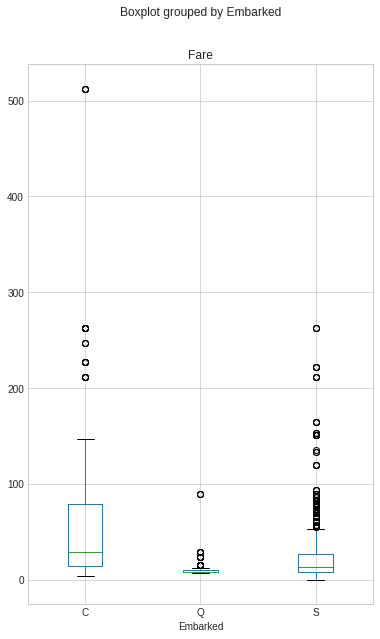

In [115]:
train_df.boxplot(column="Fare", by= "Embarked", figsize=(6,10))
plt.show()

 # **Analysis:**

When we analyzed the boxplot's, we can see three boxplot which are related to passengers embarked. First boxplot shows us passengers from Cherbourg, second from Ouenstown, and third one from Southampton. The mean of Second Boxplot is very low and we can say that these passengers are low-income. The third Boxplot is higher than the second one. But we can classify it as middlegroup and lower-income. When we lokk at the first Boxplot, we can easily see that passengers of income are higher than both second and third group. On the other hand,Missing values are 80 $. The upper outliers of second and third Boxplot are below of 80$. When we compare 80 $ with first Boxplot, it is easy to see the familiarity. As a result, we conclude that two missing values are suitable for the first boxplot and we can say that these pssengers might embark on the ship in Cherbourg.

In [43]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")

In [44]:
train_df["Embarked"].isnull().any() 

False

# **Fare:**

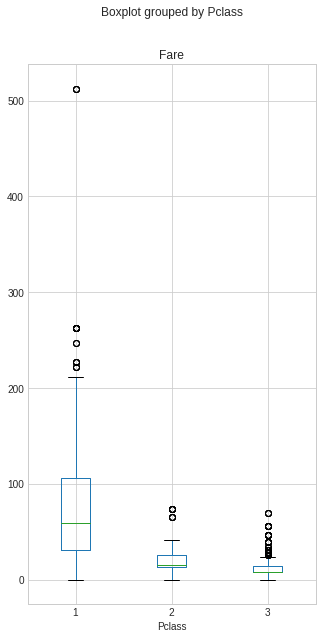

In [113]:
train_df.boxplot(column="Fare", by= "Pclass", figsize=(5,10))
plt.show()

# **Analysis:**


### **When we analyzed the boxplot's, we can see three boxplot which are related to passenger's Pclasses. First boxplot shows us passengers from First Class, second from Second Class, and third one Third Class. The mean of Third Class Boxplot is very low and we can say that these passengers are low-income. The Second Boxplot is  a little bit higher than the third one. But we can classify it as middlegroup and lower-income. When we lokk at the first Boxplot, we can easily see that passengers of income are higher than both second and third group. On the other hand,there is a missing value, but we dont know the cost of fare. When we look at the firdt Boxplot, we can see an outlier around 500$. But It might be total cost of a family or a group. So, we cant evaluate it as an one person ticket price. Otherwise, as you see at second and third Boxplot outliers are below the first one's mean. So, we cant evaluate the second and third boxplot outliers as an outliers.**

In [46]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [47]:
train_df[train_df["Pclass"] == 3]["Fare"]

0        7.2500
2        7.9250
4        8.0500
5        8.4583
7       21.0750
         ...   
1293     7.7750
1294     8.0500
1296     7.2500
1297     8.0500
1298    22.3583
Name: Fare, Length: 702, dtype: float64

In [48]:
fare_mean = train_df[train_df["Pclass"] == 3]["Fare"].mean()
fare_mean

12.741219971469327

In [49]:
train_df["Fare"]= train_df["Fare"].fillna(fare_mean)

In [50]:
train_df["Fare"].isnull().any() 

False

# **Finally:**
## **- After we detected the missing Vlaues, we repleaced the missing values with new meaningful Values without detoriating the DataFrame.**
## - **While manipulating the our DataFrames, we had to handle correctly. Otherwise, we can deform our DataFrame and get wrong results and make wrong analysises.**